<a href="https://colab.research.google.com/github/lucasmontanheiro/colab/blob/main/Jogos_do_Corinthians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jogos do Corinthians
Analisando os dados dos jogos do nosso Sport Club Corinthians Paulista!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving jogos_corinthians.csv to jogos_corinthians.csv


In [ ]:
data = pd.read_csv("/content/sample_data/jogos_corinthians.csv")

##Pre-processing

In [ ]:
print(data.describe())
print(data.head())
print(data.dtypes)
#data = data.dropna()
print(data.isnull().sum())
print(data.describe())

          ANO_JOGO  ANO_COMPETICAO
count  5652.000000     5652.000000
mean   1974.327495     1974.307502
std      26.835700       26.849086
min    1910.000000     1910.000000
25%    1955.000000     1955.000000
50%    1977.000000     1977.000000
75%    1997.000000     1997.000000
max    2017.000000     2017.000000
         DATA  ANO_JOGO  ANO_COMPETICAO TIME_MANDANTE MANDANTE_CIDADE  \
0  10/09/1910      1910            1910    UNIÃO LAPA       SÃO PAULO   
1  14/09/1910      1910            1910   CORINTHIANS       SÃO PAULO   
2  27/09/1910      1910            1910   CORINTHIANS       SÃO PAULO   
3  08/10/1910      1910            1910        MORGAN       SÃO PAULO   
4  01/01/1911      1911            1911   CORINTHIANS       SÃO PAULO   

  MANDANTE_UF_PAIS PLACAR_MANDANTE PLACAR_VISITANTE TIME_VISITANTE  \
0               SP               1                0    CORINTHIANS   
1               SP               2                0  ESTRELA POLAR   
2               SP               5  

##Results

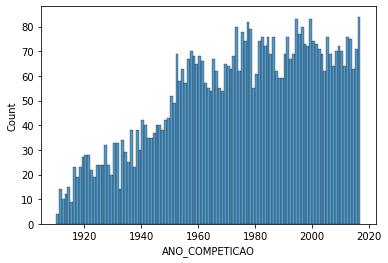

In [ ]:
#jogos por ano
sns.histplot(data.ANO_COMPETICAO, bins = 107)

In [ ]:
resultado = []
mandante = []

for i in range(len(data)):
  if data['TIME_MANDANTE'].isin(['CORINTHIANS']).values[i] == True:
    if data['PLACAR_MANDANTE'].values[i] > data['PLACAR_VISITANTE'].values[i]:
      resultado.append('VITORIA')
      mandante.append(True)
    elif data['PLACAR_MANDANTE'].values[i] == data['PLACAR_VISITANTE'].values[i]:
      resultado.append('EMPATE')
      mandante.append(True)
    elif data['PLACAR_MANDANTE'].values[i] < data['PLACAR_VISITANTE'].values[i]:
      resultado.append('DERROTA')
      mandante.append(True)
  elif data['TIME_MANDANTE'].isin(['CORINTHIANS']).values[i] == False:
    if data['PLACAR_MANDANTE'].values[i] < data['PLACAR_VISITANTE'].values[i]:
      resultado.append('VITORIA')
      mandante.append(False)
    elif data['PLACAR_MANDANTE'].values[i] == data['PLACAR_VISITANTE'].values[i]:
      resultado.append('EMPATE')
      mandante.append(False)
    elif data['PLACAR_MANDANTE'].values[i] > data['PLACAR_VISITANTE'].values[i]:
      resultado.append('DERROTA')
      mandante.append(False)

data['RESULTADO'] = resultado
data['MANDANTE'] = mandante

print(data['RESULTADO'].describe())
print(data['MANDANTE'].describe())

count        5652
unique          3
top       VITORIA
freq         2954
Name: RESULTADO, dtype: object
count      5652
unique        2
top       False
freq       2975
Name: MANDANTE, dtype: object


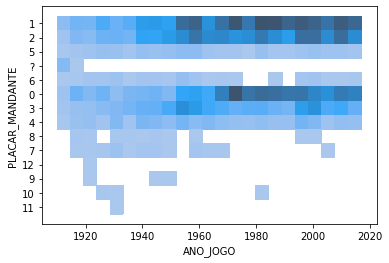

In [ ]:
sns.histplot(data=data, x='ANO_JOGO', y='PLACAR_MANDANTE')

107


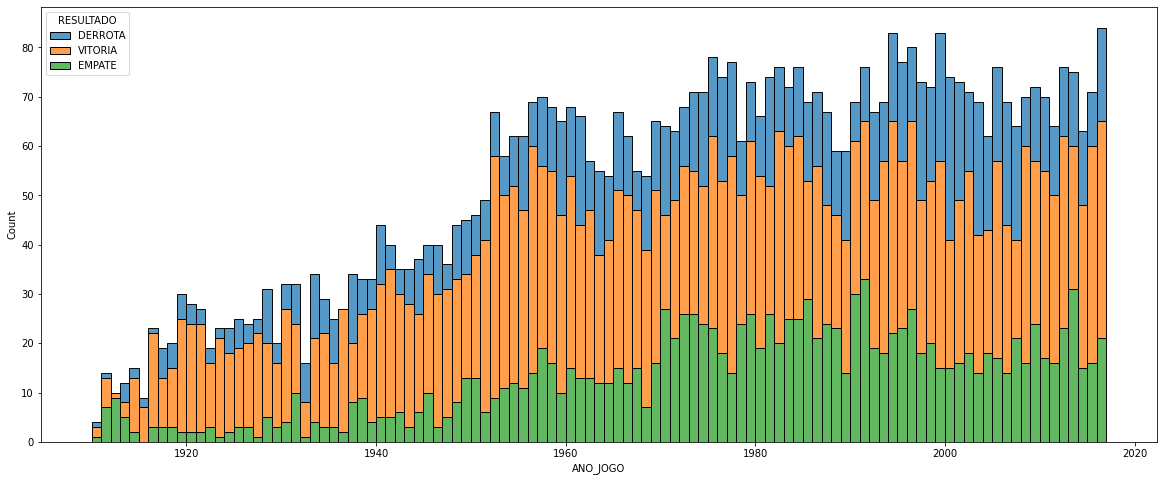

In [ ]:
plt.figure(figsize = (20,8))
b = data['ANO_JOGO'].max() - data['ANO_JOGO'].min()
print(b)
chart = sns.histplot(data=data, x="ANO_JOGO", hue="RESULTADO", multiple="stack", bins=b)

#g = sns.FacetGrid(data=data, col="MANDANTE", hue="RESULTADO")
#g.map(sns.histplot(x="ANO_JOGO", multiple="stack", bins=b))
#g.add_legend()